# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

---

# Carga de datos

In [3]:
auctions = pd.read_pickle("../../../../data/tp2/auctions_tp2_formateado.pkl")
clicks = pd.read_pickle("../../../../data/tp2/clicks_tp2_formateado.pkl")
events = pd.read_pickle("../../../../data/tp2/events_tp2_formateado.pkl")
installs = pd.read_pickle("../../../../data/tp2/clicks_tp2_formateado.pkl")

---

# Cargo dispositivos de la competencia

In [4]:
targets = pd.read_pickle("../../../../data/tp2/ref_hashes_target.pkl")

---

# Cargo los labels calculados hasta el momento

In [3]:
labels_v1 = pd.read_pickle("../../targets/targets_ventana_1_auctions.pkl")
labels_v2 = pd.read_pickle("../../targets/targets_ventana_2_auctions.pkl")
labels_v3 = pd.read_pickle("../../targets/targets_ventana_3_auctions.pkl")
labels_v4 = pd.read_pickle("../../targets/targets_ventana_4_auctions.pkl")
labels_v5 = pd.read_pickle("../../targets/targets_ventana_5_auctions.pkl")

# Observo que tan uniforme es el comportamiento de los dispositivos

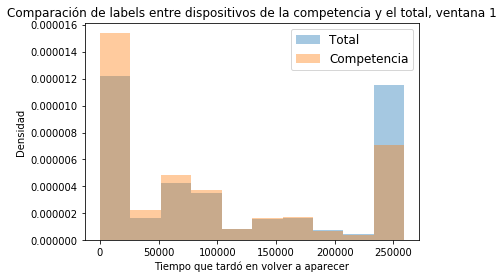

In [39]:
sns.distplot(labels_v1["target"],  kde=False, label='Total',norm_hist=True,bins=10)
sns.distplot(labels_v1.loc[labels_v1.index.isin(targets.index)]["target"],  kde=False, label='Competencia', norm_hist=True, bins=10)

plt.legend(prop={'size': 12})
plt.title('Comparación de labels entre dispositivos de la competencia y el total, ventana 1')
plt.xlabel('Tiempo que tardó en volver a aparecer')
plt.ylabel('Densidad');

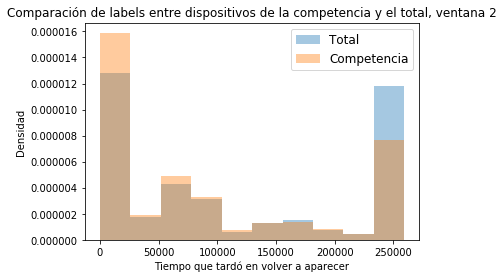

In [40]:
sns.distplot(labels_v2["target"],  kde=False, label='Total',norm_hist=True,bins=10)
sns.distplot(labels_v2.loc[labels_v2.index.isin(targets.index)]["target"],  kde=False, label='Competencia', norm_hist=True, bins=10)

plt.legend(prop={'size': 12})
plt.title('Comparación de labels entre dispositivos de la competencia y el total, ventana 2')
plt.xlabel('Tiempo que tardó en volver a aparecer')
plt.ylabel('Densidad');

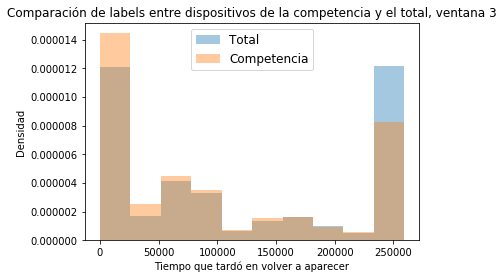

In [41]:
sns.distplot(labels_v3["target"],  kde=False, label='Total',norm_hist=True,bins=10)
sns.distplot(labels_v3.loc[labels_v3.index.isin(targets.index)]["target"],  kde=False, label='Competencia', norm_hist=True, bins=10)

plt.legend(prop={'size': 12})
plt.title('Comparación de labels entre dispositivos de la competencia y el total, ventana 3')
plt.xlabel('Tiempo que tardó en volver a aparecer')
plt.ylabel('Densidad');

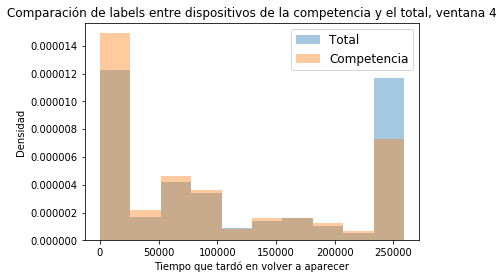

In [42]:
sns.distplot(labels_v4["target"],  kde=False, label='Total',norm_hist=True,bins=10)
sns.distplot(labels_v4.loc[labels_v4.index.isin(targets.index)]["target"],  kde=False, label='Competencia', norm_hist=True, bins=10)

plt.legend(prop={'size': 12})
plt.title('Comparación de labels entre dispositivos de la competencia y el total, ventana 4')
plt.xlabel('Tiempo que tardó en volver a aparecer')
plt.ylabel('Densidad');

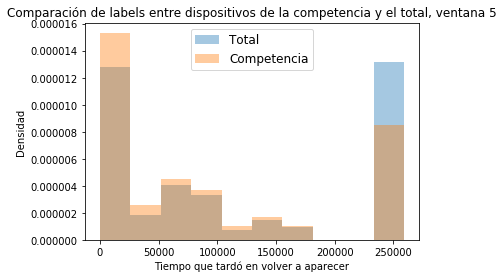

In [43]:
sns.distplot(labels_v5["target"],  kde=False, label='Total',norm_hist=True,bins=10)
sns.distplot(labels_v5.loc[labels_v5.index.isin(targets.index)]["target"],  kde=False, label='Competencia', norm_hist=True, bins=10)

plt.legend(prop={'size': 12})
plt.title('Comparación de labels entre dispositivos de la competencia y el total, ventana 5')
plt.xlabel('Tiempo que tardó en volver a aparecer')
plt.ylabel('Densidad');

---

# Análisis de similaridad de dispositivos
Me interesa ver:
- Todos los dispositivos que aparecen en la ventana 1 de auctions y events
- Todos los dispositivos que aparecen en la ventana 3 de auctions, events y clicks, etc

### Armo ventanas

In [5]:
for ventana_nro in range(1,6):
    auctions["ventana_{}".format(ventana_nro)] = (((17+ventana_nro) <= auctions["date"].dt.day) & ((auctions["date"].dt.day) <= (19+ventana_nro)))

In [6]:
auctions["ventana_final"] = (((25) <= auctions["date"].dt.day) & ((auctions["date"].dt.day) <= (27)))

In [7]:
for ventana_nro in range(1,6):
    events["ventana_{}".format(ventana_nro)] = (((17+ventana_nro) <= events["date"].dt.day) & ((events["date"].dt.day) <= (19+ventana_nro)))

In [8]:
events["ventana_final"] = (((25) <= events["date"].dt.day) & ((events["date"].dt.day) <= (27)))

In [9]:
for ventana_nro in range(1,6):
    clicks["ventana_{}".format(ventana_nro)] = (((17+ventana_nro) <= clicks["created"].dt.day) & ((clicks["created"].dt.day) <= (19+ventana_nro)))

In [10]:
clicks["ventana_final"] = (((25) <= clicks["created"].dt.day) & ((clicks["created"].dt.day) <= (27)))

In [11]:
for ventana_nro in range(1,6):
    installs["ventana_{}".format(ventana_nro)] = (((17+ventana_nro) <= installs["created"].dt.day) & ((installs["created"].dt.day) <= (19+ventana_nro)))

In [12]:
installs["ventana_final"] = (((25) <= installs["created"].dt.day) & ((installs["created"].dt.day) <= (27)))

---

# Renombro columnas

In [14]:
events.rename(columns={"ref_hash" : "device_id"}, inplace=True)

In [15]:
installs.rename(columns={"ref_hash" : "device_id"}, inplace=True)

In [16]:
clicks.rename(columns={"ref_hash" : "device_id"}, inplace=True)

---

In [96]:
caracteristicas = targets.copy()

In [97]:
caracteristicas["en_v1_auctions"] = caracteristicas.index.isin(auctions.loc[auctions["ventana_1"]]["device_id"])

In [120]:
datasets = [auctions, installs, clicks, events]
datasets_nombres = ["auctions", "installs", "clicks", "events"]
ventanas = ["ventana_1", "ventana_2", "ventana_3", "ventana_4", "ventana_5", "ventana_final"]

In [123]:
for dataset in range(4):
    for ventana in ventanas:
        caracteristicas["en_{}_{}".format(ventana, datasets_nombres[dataset])] = caracteristicas.index.isin(datasets[dataset].loc[datasets[dataset][ventana]]["device_id"])

---

In [19]:
targets_ventana_1 = targets.copy()

In [20]:
targets_ventana_1["en_v1_auctions"] = targets_ventana_1.index.isin(auctions.loc[auctions["ventana_1"]]["device_id"])

In [21]:
targets_ventana_1["en_v1_events"] = targets_ventana_1.index.isin(events.loc[events["ventana_1"]]["device_id"])

In [22]:
targets_ventana_1["en_v1_clicks"] = targets_ventana_1.index.isin(clicks.loc[clicks["ventana_1"]]["device_id"])

In [23]:
targets_ventana_1["en_v1_installs"] = targets_ventana_1.index.isin(installs.loc[clicks["ventana_1"]]["device_id"])

In [28]:
targets_ventana_1["OR"] = (targets_ventana_1["en_v1_auctions"] | targets_ventana_1["en_v1_events"] | targets_ventana_1["en_v1_clicks"] | targets_ventana_1["en_v1_installs"])

In [30]:
targets_ventana_1_alguna = targets_ventana_1.loc[targets_ventana_1["OR"]]

In [35]:
targets_ventana_1_alguna.groupby(['en_v1_auctions', 'en_v1_events', 'en_v1_clicks', 'en_v1_installs']).agg("count")

OR
en_v1_auctions en_v1_events en_v1_clicks en_v1_installs      
False          True         False        False            271
True           False        False        False           1597
                            True         True              39
               True         False        False           1056
                            True         True              53

---

In [46]:
devices_auctions = auctions["device_id"].drop_duplicates()

In [47]:
devices_events = events["device_id"].drop_duplicates()

In [49]:
devices_clicks = clicks["device_id"].drop_duplicates()

In [50]:
devices_installs = installs["device_id"].drop_duplicates()

In [72]:
devices_todos = (devices_auctions.append(devices_events).append(devices_clicks).append(devices_installs)).drop_duplicates()

In [73]:
devices_todos = devices_todos.to_frame()

In [74]:
devices_todos = devices_todos.set_index("device_id")

---

In [76]:
devices_todos["en_v1_auctions"] = devices_todos.index.isin(auctions.loc[auctions["ventana_1"]]["device_id"])

In [77]:
devices_todos["en_v1_events"] = devices_todos.index.isin(events.loc[events["ventana_1"]]["device_id"])

In [78]:
devices_todos["en_v1_clicks"] = devices_todos.index.isin(clicks.loc[clicks["ventana_1"]]["device_id"])

In [79]:
devices_todos["en_v1_installs"] = devices_todos.index.isin(installs.loc[clicks["ventana_1"]]["device_id"])

In [80]:
devices_todos["OR"] = (devices_todos["en_v1_auctions"] | devices_todos["en_v1_events"] | devices_todos["en_v1_clicks"] | devices_todos["en_v1_installs"])

In [81]:
devices_todos_alguna = devices_todos.loc[devices_todos["OR"]]

In [82]:
devices_todos_alguna.groupby(['en_v1_auctions', 'en_v1_events', 'en_v1_clicks', 'en_v1_installs']).agg("count")

OR
en_v1_auctions en_v1_events en_v1_clicks en_v1_installs        
False          False        True         True                64
               True         False        False            88705
                            True         True                39
True           False        False        False           235347
                            True         True              5720
               True         False        False            73896
                            True         True              3362

In [83]:
targets_ventana_1_alguna.groupby(['en_v1_auctions', 'en_v1_events', 'en_v1_clicks', 'en_v1_installs']).agg("count")

OR
en_v1_auctions en_v1_events en_v1_clicks en_v1_installs      
False          True         False        False            271
True           False        False        False           1597
                            True         True              39
               True         False        False           1056
                            True         True              53